# Preprocessing

In [1]:
import os
import pandas as pd
a = os.listdir('HW1_data')
a.sort()
index = 0
for item in a:
    if(item[-1] == "v"):
        if(index == 0):
            df = pd.read_csv('HW1_data/'+item, encoding = 'Big5')
            df['商品代號']  = df['商品代號'].astype(str).str.strip()
            df['到期月份(週別)']  = df['到期月份(週別)'].astype(str).str.strip()
            df = df[df['商品代號'] == "TX"]
            df = df[df['到期月份(週別)'] == '202110']
            df = df.drop(columns=['近月價格','遠月價格','開盤集合競價 '])
        elif(index == 1):
            df2 = pd.read_csv('HW1_data/'+item, encoding = 'Big5')
            df2['商品代號']  = df2['商品代號'].astype(str).str.strip()
            df2['到期月份(週別)']  = df2['到期月份(週別)'].astype(str).str.strip()
            df2 = df2[df2['商品代號'] == "TX"]
            df2 = df2[df2['到期月份(週別)'] == '202110']
            df2 = df2.drop(columns=['近月價格','遠月價格','開盤集合競價 '])
            new_df = pd.concat([df, df2])
        else:
            df2 = pd.read_csv('HW1_data/'+item, encoding = 'Big5')
            df2['商品代號']  = df2['商品代號'].astype(str).str.strip()
            df2['到期月份(週別)']  = df2['到期月份(週別)'].astype(str).str.strip()
            df2 = df2[df2['商品代號'] == "TX"]
            df2 = df2[df2['到期月份(週別)'] == '202110']
            df2 = df2.drop(columns=['近月價格','遠月價格','開盤集合競價 '])
            new_df = pd.concat([new_df, df2])
        index += 1
new_df = new_df.reset_index().drop(columns=['index'])
new_df.to_csv('TX.csv', encoding = 'Big5',index=False)

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Readcsv and Import

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance.original_flavor as mpf
df = pd.read_csv('TX.csv', encoding = 'Big5')

# Time Bar

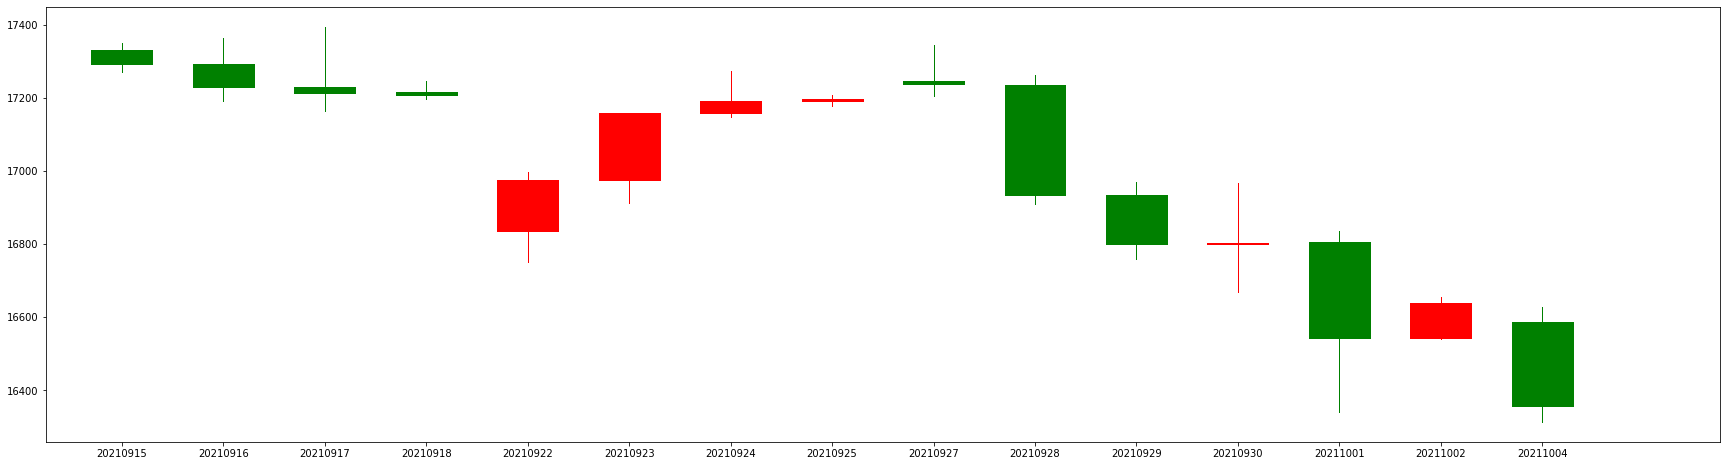

In [3]:
date = np.sort(df['成交日期'].unique())
max_list = []
min_list = []
open_list = []
close_list = []
for item in date:
    max_list.append(df[df['成交日期'] == item]['成交價格'].astype(int).max())
    min_list.append(df[df['成交日期'] == item]['成交價格'].astype(int).min())
    open_list.append(df[df['成交日期'] == item]['成交價格'].astype(int).iloc[0])
    close_list.append(df[df['成交日期'] == item]['成交價格'].astype(int).iloc[-1])
fig = plt.figure(figsize=(30, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(date), 1))
ax.set_xticklabels(date)
mpf.candlestick2_ochl(ax, open_list, close_list, max_list,min_list, width=0.6, colorup='r', colordown='g', alpha=1)

plt.savefig('Time Bar.png')

# Tick Bar

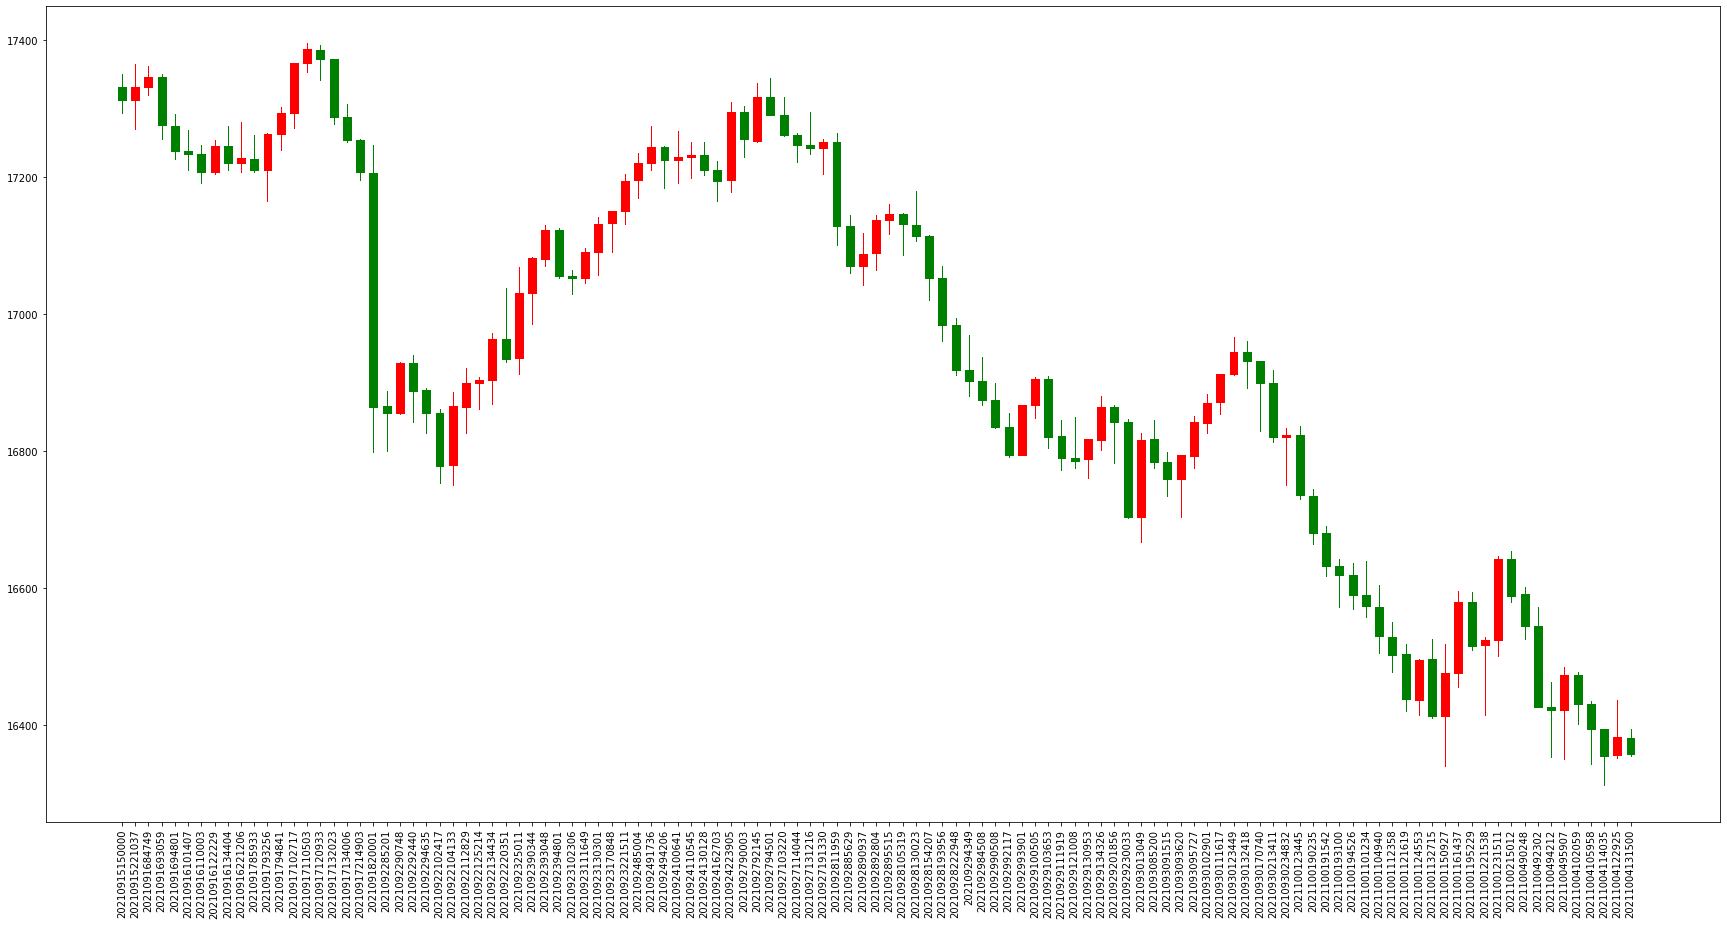

In [4]:
max_list = []
min_list = []
open_list = []
close_list = []
date = []
pointer_array = []
epochs = int(len(df)/10000)
for i in range(epochs):
    tmp_array = np.array(df['成交價格'].astype(int).iloc[i*10000:i*10000 + 10000])
    max_list.append(tmp_array.max())
    min_list.append(tmp_array.min())
    open_list.append(tmp_array[0])
    close_list.append(tmp_array[-1])
    pointer_array.append(i*10000)

tmp_array = np.array(df['成交價格'].astype(int).iloc[114*10000:])
max_list.append(tmp_array.max())
min_list.append(tmp_array.min())
open_list.append(tmp_array[0])
close_list.append(tmp_array[-1])
pointer_array.append(114*10000)

date = np.array(df['成交日期'].astype(str))[pointer_array] + np.array(df['成交時間'].astype(str))[pointer_array]
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(date), 1))
ax.set_xticklabels(date,rotation=90)
mpf.candlestick2_ochl(ax, open_list, close_list, max_list,min_list, width=0.6, colorup='r', colordown='g', alpha=1)

plt.savefig('Tick Bar.png')

# Volume Bar

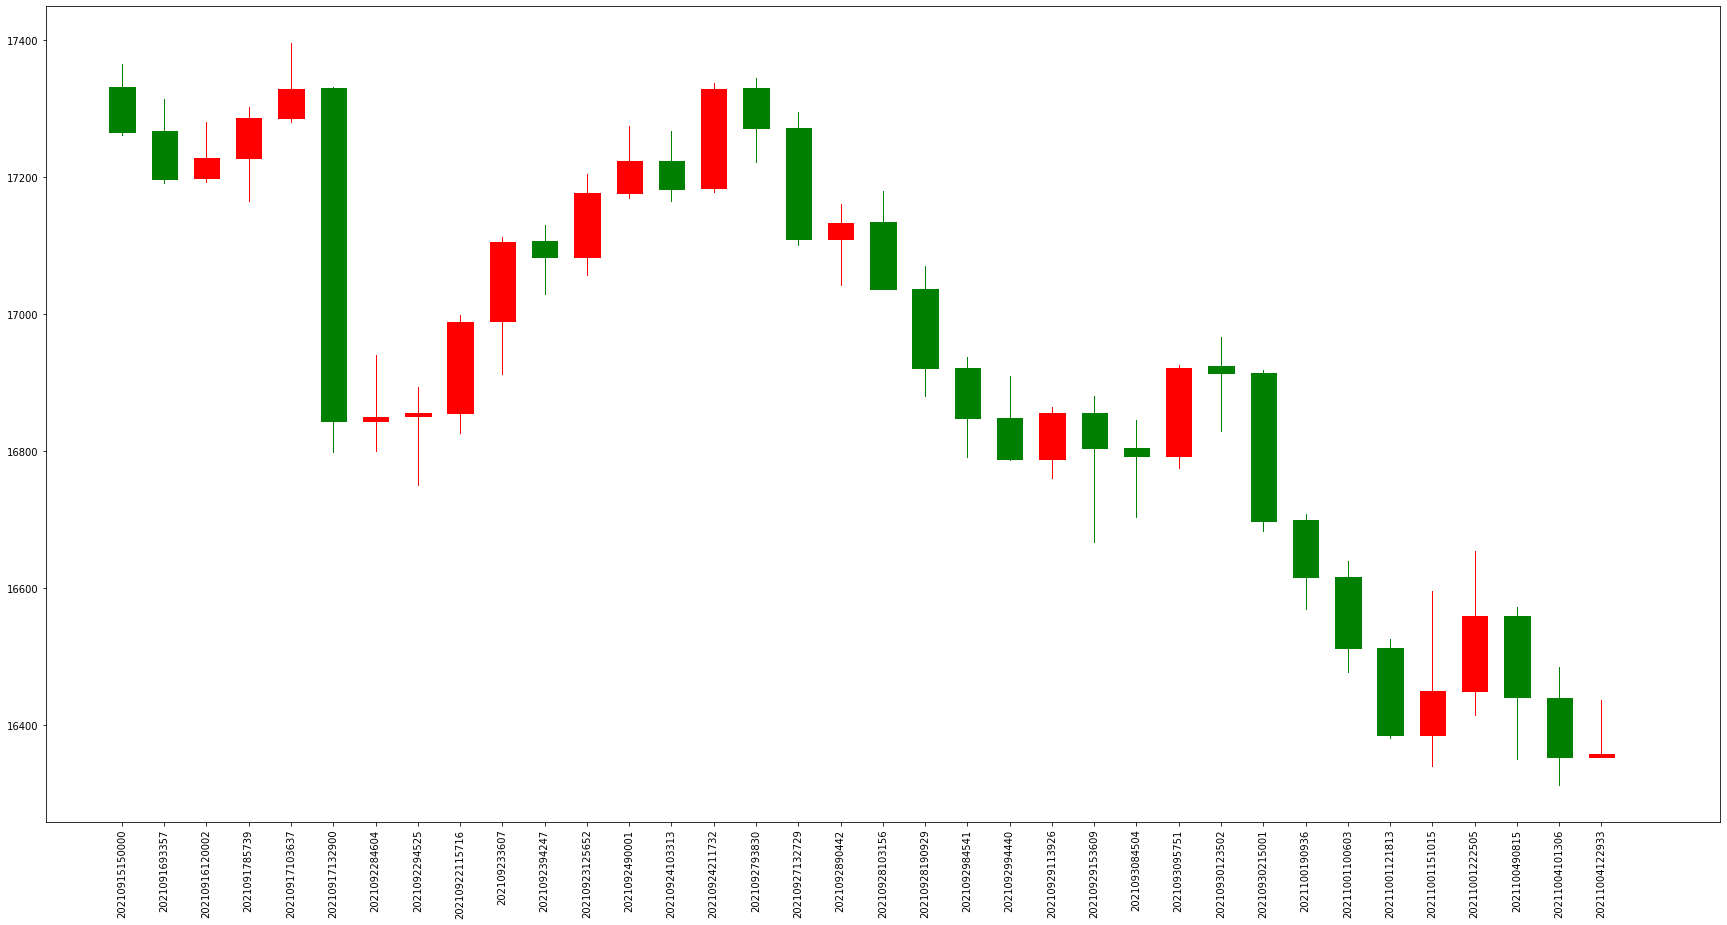

In [5]:
max_list = []
min_list = []
open_list = []
close_list = []
date = []
pointer_array = []
tmp_array = np.array(df['成交數量(B+S)']).astype(int)
price_array = np.array(df['成交價格']).astype(int)
tmp_sum = 0
prev_i = 0
for i in range(len(df)): 
    if((tmp_sum + tmp_array[i]) > 100000):
        pointer_array.append(prev_i)
        tmp_sum = 0
        max_list.append(price_array[prev_i:i].max())
        min_list.append(price_array[prev_i:i].min())
        open_list.append(price_array[prev_i:i][0])
        close_list.append(price_array[prev_i:i][-1])
        prev_i = i                      
    tmp_sum += tmp_array[i]
pointer_array.append(prev_i)
max_list.append(price_array[prev_i:i].max())
min_list.append(price_array[prev_i:i].min())
open_list.append(price_array[prev_i:i][0])
close_list.append(price_array[prev_i:i][-1])

date = np.array(df['成交日期'].astype(str))[pointer_array] + np.array(df['成交時間'].astype(str))[pointer_array]
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(date), 1))
ax.set_xticklabels(date,rotation=90)
mpf.candlestick2_ochl(ax, open_list, close_list, max_list,min_list, width=0.6, colorup='r', colordown='g', alpha=1)

plt.savefig('Volume Bar.png')

# Dollar Bar

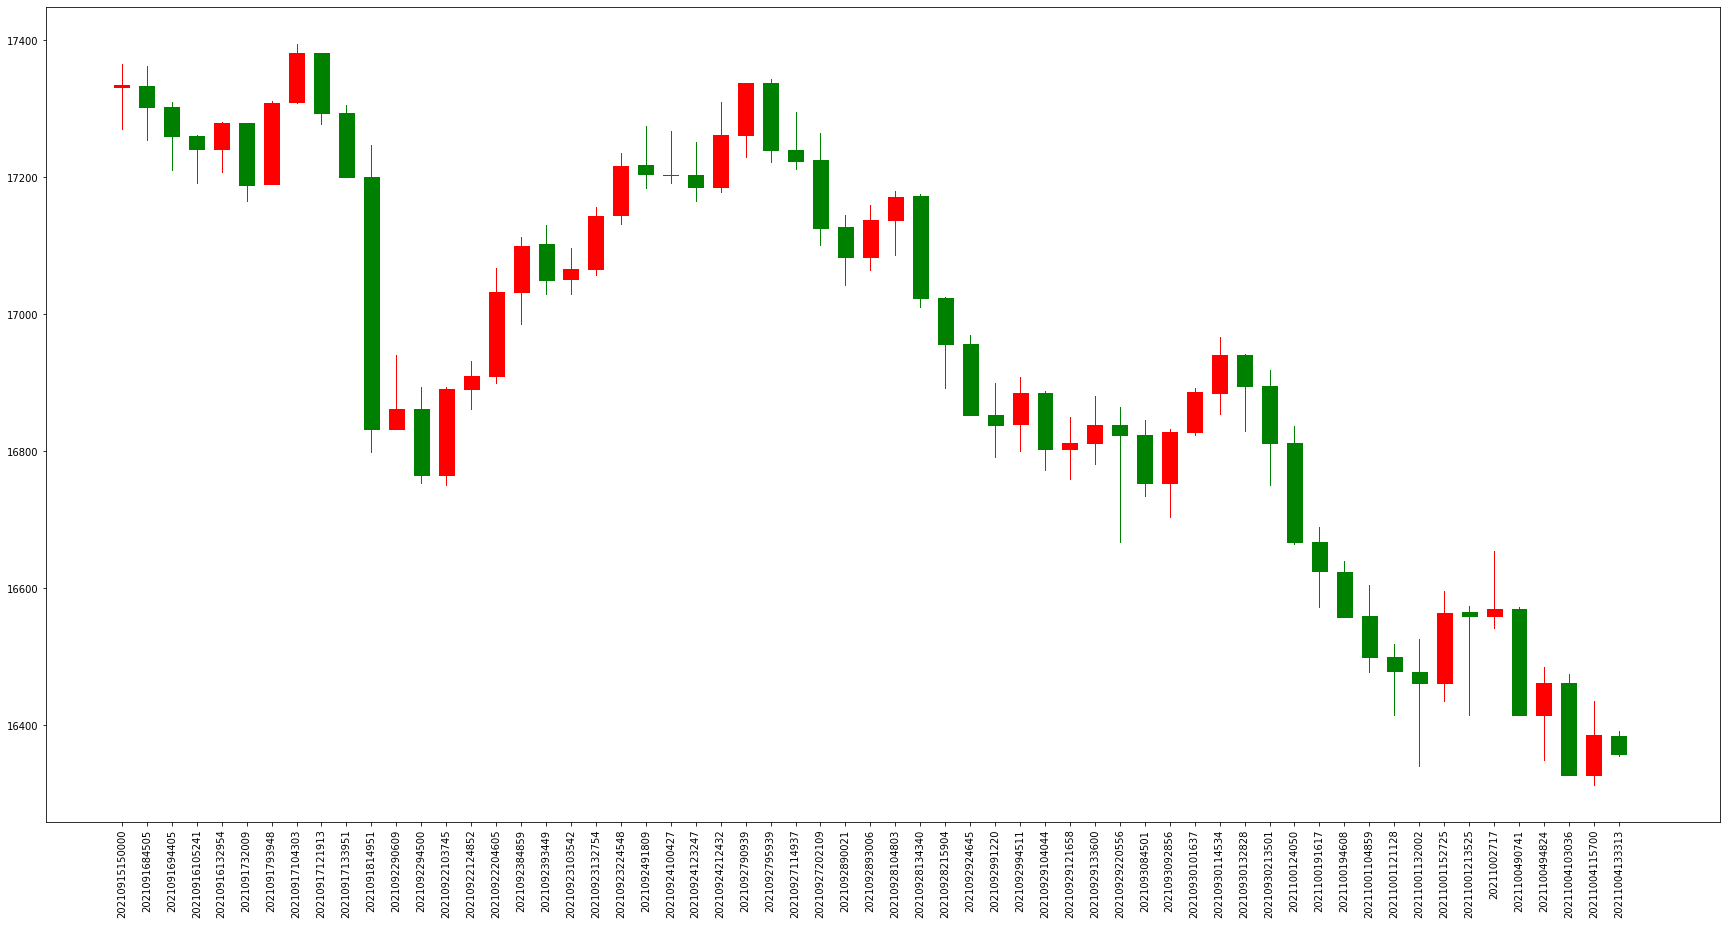

In [6]:
max_list = []
min_list = []
open_list = []
close_list = []
date = []
pointer_array = []
tmp_array = np.array(df['成交數量(B+S)']).astype(int)
price_array = np.array(df['成交價格']).astype(int)
tmp_sum = 0
prev_i = 0
for i in range(len(df)): 
    if((tmp_sum + tmp_array[i]*price_array[i] ) > 1000000000):
        pointer_array.append(prev_i)
        tmp_sum = 0
        max_list.append(price_array[prev_i:i].max())
        min_list.append(price_array[prev_i:i].min())
        open_list.append(price_array[prev_i:i][0])
        close_list.append(price_array[prev_i:i][-1])
        prev_i = i                      
    tmp_sum += tmp_array[i]*price_array[i]
pointer_array.append(prev_i)
max_list.append(price_array[prev_i:i].max())
min_list.append(price_array[prev_i:i].min())
open_list.append(price_array[prev_i:i][0])
close_list.append(price_array[prev_i:i][-1])

date = np.array(df['成交日期'].astype(str))[pointer_array] + np.array(df['成交時間'].astype(str))[pointer_array]
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(date), 1))
ax.set_xticklabels(date,rotation=90)
mpf.candlestick2_ochl(ax, open_list, close_list, max_list,min_list, width=0.6, colorup='r', colordown='g', alpha=1)

plt.savefig('Dollar Bar.png')